
# INTRODUCTION TO CLASSIFICATION

Work plan:

* Read in the data
* Split the data into **training** and **test** sets
* Build a model using the **training** set
* Evaluate the model using the **test** set


Please download the data file "players.txt" into a local directory.

We are going to use the sklearn library. 

In [10]:
# %pip install sklearn

In [12]:
import sklearn
import pandas as pd
import numpy as np

In [17]:
players = pd.read_csv("players.txt")
players

,id,height,weight,position,firstseason,lastseason,games,pts,reb,ast,stl,fga,fgm,fta,ftm
0,ABDELAL01,208,109.0,F,1990,1994,256,1465,846,85,71,1236,620,321,225
1,ABDULKA01,218,102.0,C,1969,1988,1560,38387,17440,5660,1160,28307,15837,9304,6712
2,ABDULMA01,185,73.0,G,1990,2000,586,8553,1087,2079,487,7943,3514,1161,1051
3,ABDULTA01,198,101.0,G,1997,2002,236,1830,776,266,184,1726,720,529,372
4,ABDURSH01,206,102.0,F,1996,2007,830,15028,6239,2109,820,11515,5434,4943,4006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,ZIDEKGE01,213,113.0,C,1995,1997,135,453,286,32,14,395,161,166,130
3155,ZIMMEDE01,190,88.0,G,2005,2005,2,4,4,7,0,3,2,0,0
3156,ZOETJI01,216,109.0,C,1982,1982,7,2,8,1,1,5,1,0,0
3157,ZOPFBI01,185,77.0,G,1970,1970,53,118,46,73,0,135,49,36,20


In [18]:
players.describe()

,height,weight,firstseason,lastseason,games,pts,reb,ast,stl,fga,fgm,fta,ftm
count,3159.000000,3154.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000
mean,197.446977,93.400761,1976.811649,1980.977841,262.232352,2649.377335,1147.540361,602.831592,161.854068,2270.276986,1024.405825,738.469452,551.042102
std,9.371897,11.559818,17.972491,18.994220,307.130133,4451.976897,2081.318544,1151.617958,319.424553,3637.325548,1717.221442,1282.240649,980.769918
min,160.000000,60.000000,1946.000000,1946.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,84.000000,1962.000000,1968.000000,31.000000,81.000000,22.000000,15.000000,0.000000,88.000000,31.000000,26.000000,17.000000
50%,198.000000,93.000000,1979.000000,1984.000000,115.000000,542.000000,196.000000,109.000000,12.000000,518.000000,207.000000,162.000000,110.000000
75%,203.000000,100.000000,1991.000000,1997.000000,438.500000,3257.000000,1419.000000,635.000000,158.500000,2904.500000,1253.500000,896.000000,653.500000
max,231.000000,150.000000,2008.000000,2008.000000,1611.000000,38387.000000,23924.000000,15806.000000,3265.000000,28307.000000,15837.000000,13188.000000,9787.000000


# ATTENTION

The "id" attribute uniquely identifies a player within our data set. 
This attribute cannot be used to classify new players as each player has a different id number. It is always important to check whether the data contains unnecessary attributes.

Before we continue, we'll remove the "id" attribute from our data set!

In [19]:
players = players.drop('id', axis=1)
players

,height,weight,position,firstseason,lastseason,games,pts,reb,ast,stl,fga,fgm,fta,ftm
0,208,109.0,F,1990,1994,256,1465,846,85,71,1236,620,321,225
1,218,102.0,C,1969,1988,1560,38387,17440,5660,1160,28307,15837,9304,6712
2,185,73.0,G,1990,2000,586,8553,1087,2079,487,7943,3514,1161,1051
3,198,101.0,G,1997,2002,236,1830,776,266,184,1726,720,529,372
4,206,102.0,F,1996,2007,830,15028,6239,2109,820,11515,5434,4943,4006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,213,113.0,C,1995,1997,135,453,286,32,14,395,161,166,130
3155,190,88.0,G,2005,2005,2,4,4,7,0,3,2,0,0
3156,216,109.0,C,1982,1982,7,2,8,1,1,5,1,0,0
3157,185,77.0,G,1970,1970,53,118,46,73,0,135,49,36,20


# Example 1 - Prediction of playing position


We want to build a model to predict a player's playing position 
with respect to the given player's statistics. The target variable "position" is discrete - we term this a classification task. We aim to verify whether or not it is possible to use historical data to predict
playing positions for new players. 


We are going to split the data into a training and testing data set.
The training data set consists of players that ended their careers before 1999.
The test data set consists of players that began their careers after 1999.


In [20]:
players['lastseason'] <= 1999
train = players[players['lastseason'] <= 1999]
test = players[players['firstseason'] > 1999]
print("Number of training examples:", len(train))
print("Number of test examples:", len(test))
print("ratio of train examples:", len(train)/(len(train)+len(test)))

Number of training examples: 2517
Number of test examples: 314
ratio of train examples: 0.8890851289297068


We used the "firstseason" and "lastseason" attributes to split the data. Therefore the attributes are not going to contribute to the modelling task, so we will remove them.

In [21]:
train = train.drop('lastseason', axis=1)
train = train.drop('firstseason', axis=1)

test = test.drop('lastseason', axis=1)
test  = test.drop('firstseason', axis=1)

Lets inspect the player positions in each set

In [22]:
train['position'].value_counts()

position
F    1084
G    1030
C     403
Name: count, dtype: int64

In [23]:
test['position'].value_counts()

position
G    134
F    121
C     59
Name: count, dtype: int64

# Majority classifier

The majority class is the class with the highest number of training examples. This is the simplest classifier can be used as a baseline for comparison with other classifiers.

In [24]:
majority_index = train['position'].value_counts().argmax()

majority_class = train['position'].value_counts().index[majority_index]

print(majority_class)

F


How well does this perform on the test set?

We can evaluate model performance using classification accuracy (the percentage of correct predictions on the test set).

In [25]:
correct_predictions = test[test['position'] == majority_class]
CA = len(correct_predictions) / len(test)
CA

0.3853503184713376

# Decision Tree

The goal of decision trees is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Each node of a decision tree splits the dataset according to a decision rule.

## Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

## Some disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [26]:
from sklearn import tree

All sklearn classifiers can be used with the following steps:

* Create a classifier object
* Fit the classifier with .fit(X, Y) on the TRAIN set
* Obtain the predictions with .predict(X) on the TEST set

In [27]:
X_train = train.drop('position', axis=1)    # Everything except the class
Y_train = train['position']                 # Just the class

X_test = test.drop('position', axis=1)
Y_test = test['position']

Error - our dataset contains missing values, which can cause errors when training classifiers. We remove missing values before training a classifier

In [28]:
train = train.dropna()
test = test.dropna()

In [29]:
# max_depth controls the maximum depth of the decision tree. Smaller trees are less complex but can help prevent overfitting
clf = tree.DecisionTreeClassifier(max_depth = 3)   
clf.fit(train.drop('position', axis=1), train['position'])

DecisionTreeClassifier(max_depth=3)

Visualize the tree

In [30]:
column_names=list(train.drop('position', axis=1).columns)

In [31]:
print(tree.export_text(clf, feature_names = column_names))

|--- height <= 193.50
|   |--- weight <= 90.50
|   |   |--- reb <= 0.50
|   |   |   |--- class: G
|   |   |--- reb >  0.50
|   |   |   |--- class: G
|   |--- weight >  90.50
|   |   |--- stl <= 1.50
|   |   |   |--- class: F
|   |   |--- stl >  1.50
|   |   |   |--- class: G
|--- height >  193.50
|   |--- height <= 206.50
|   |   |--- height <= 200.00
|   |   |   |--- class: F
|   |   |--- height >  200.00
|   |   |   |--- class: F
|   |--- height >  206.50
|   |   |--- height <= 210.50
|   |   |   |--- class: C
|   |   |--- height >  210.50
|   |   |   |--- class: C



After training, obtain predictions with .predict()

In [32]:
preds = clf.predict(X_test)
preds

array(['F', 'G', 'F', 'G', 'F', 'C', 'F', 'F', 'C', 'C', 'C', 'F', 'C',
       'C', 'G', 'G', 'G', 'F', 'F', 'C', 'C', 'F', 'F', 'C', 'G', 'G',
       'C', 'G', 'C', 'C', 'F', 'C', 'F', 'G', 'G', 'F', 'F', 'G', 'C',
       'F', 'G', 'C', 'G', 'G', 'F', 'C', 'G', 'F', 'G', 'F', 'G', 'G',
       'C', 'G', 'G', 'F', 'G', 'F', 'F', 'C', 'F', 'G', 'G', 'F', 'F',
       'G', 'G', 'C', 'F', 'F', 'F', 'C', 'G', 'C', 'F', 'G', 'F', 'C',
       'F', 'F', 'G', 'F', 'G', 'F', 'F', 'F', 'G', 'C', 'F', 'F', 'C',
       'F', 'F', 'F', 'F', 'F', 'G', 'F', 'F', 'G', 'F', 'C', 'C', 'F',
       'F', 'G', 'G', 'G', 'C', 'G', 'G', 'F', 'F', 'C', 'C', 'F', 'F',
       'C', 'G', 'F', 'F', 'F', 'F', 'C', 'C', 'G', 'F', 'F', 'C', 'F',
       'F', 'C', 'F', 'C', 'F', 'F', 'G', 'F', 'G', 'G', 'C', 'C', 'F',
       'C', 'F', 'F', 'C', 'F', 'G', 'F', 'C', 'C', 'F', 'F', 'F', 'G',
       'F', 'F', 'F', 'C', 'F', 'F', 'C', 'C', 'F', 'F', 'G', 'G', 'G',
       'G', 'F', 'F', 'C', 'F', 'G', 'C', 'F', 'F', 'G', 'G', 'C

How good is the model?

Let's calculate the classification accuracy.

In [33]:
correct_predictions = (preds == Y_test)
correct_predictions

8       False
14       True
18      False
20       True
27      False
        ...  
3126     True
3127     True
3135    False
3146    False
3155     True
Name: position, Length: 314, dtype: bool

In [34]:
CA = sum(correct_predictions) / len(preds)
CA

0.6910828025477707

We can examine the results further using a confusion matrix

In [ ]:
# true vaule / predicted value
#    G   F   C
# G  x   x   x
# F  x   x   x
# C  x   x   x 

In [35]:
conf_mat = sklearn.metrics.confusion_matrix(preds, Y_test)
print(conf_mat)

[[56 35  1]
 [ 3 84 56]
 [ 0  2 77]]


We can also obtain the CA by summing the diagonal of a confusion matrix (the correct predictions) and dividing it with the sum of the whole matrix

In [36]:
np.sum(np.diag(conf_mat)) / np.sum(conf_mat)

np.float64(0.6910828025477707)

Addionally, we can obtain class probabilities instead of discrete predictions.

This can be used to calculate alternative scores, such as the Brier score, which also takes into account class probabilities and returns a value between 0 (best) and 1 (worst).

In [37]:
preds_proba = clf.predict_proba(X_test)
preds_proba

array([[0.06157113, 0.59447983, 0.34394904],
       [0.        , 0.17948718, 0.82051282],
       [0.06157113, 0.59447983, 0.34394904],
       [0.00143678, 0.06609195, 0.93247126],
       [0.06157113, 0.59447983, 0.34394904],
       [0.8622449 , 0.13265306, 0.00510204],
       [0.06157113, 0.59447983, 0.34394904],
       [0.06157113, 0.59447983, 0.34394904],
       [0.8622449 , 0.13265306, 0.00510204],
       [0.8622449 , 0.13265306, 0.00510204],
       [0.8622449 , 0.13265306, 0.00510204],
       [0.06157113, 0.59447983, 0.34394904],
       [0.58823529, 0.40441176, 0.00735294],
       [0.8622449 , 0.13265306, 0.00510204],
       [0.00143678, 0.06609195, 0.93247126],
       [0.00143678, 0.06609195, 0.93247126],
       [0.00143678, 0.06609195, 0.93247126],
       [0.06157113, 0.59447983, 0.34394904],
       [0.1732746 , 0.78707783, 0.03964758],
       [0.8622449 , 0.13265306, 0.00510204],
       [0.58823529, 0.40441176, 0.00735294],
       [0.1732746 , 0.78707783, 0.03964758],
       [0.

In [38]:
# Encode ground truth classes to bits
# Sklearn encoders can be used to change data in various ways
encoder = sklearn.preprocessing.OneHotEncoder()
# Encoders require a 2D array so reshape is needed
Y_test_proba = encoder.fit_transform(np.array(Y_test).reshape(-1, 1))
Y_test_proba.todense()

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0

In [39]:
def brier_score(preds, ground_truth):
    return np.sum((ground_truth - preds) ** 2) / len(preds)

In [40]:
brier_score(preds_proba, np.array(Y_test_proba.todense()))

np.float64(0.3739547573927108)

# Example 2

Does a player make more than 80% of free-throws attempted?

This is a binary problem (the target variable is discrete with values YES and NO). We do not have this attribute, so we will need to calculate it.

In [41]:
# Select only players who have made at least 1 free throw
bin_players = players[players['fta'] > 0].copy()

# Calculate free-throw success rate
free_throw_rate = bin_players['ftm'] / bin_players['fta']

# Create a discrete attribute "ftexpert". This will be our target variable.
ftexpert = pd.cut(free_throw_rate, [-1, 0.8, 1], labels=["NO", "YES"])

# Assign the new attribute to a new column
bin_players['ftexpert'] = ftexpert

bin_players = bin_players.dropna()

**Important:** The new ftexpert attribute is based on two existing attributes (fta, ftm). Therefore, it would be very easy to predict if we left these two attributes in the dataset. These two attributes must be removed.

**Important:** DecisionTreeClassifier needs all attributes to be numbers. Here, the "position" attribute is a string (either "G", "C", or "F") so it must first be converted to a number. This can be done using pd.get_dummies()

In [42]:
bin_players = bin_players.drop('fta', axis=1)
bin_players = bin_players.drop('ftm', axis=1)

In [43]:
#bin_players['position'] = bin_players['position'].astype('category')
bin_players = pd.get_dummies(bin_players, columns = ["position"])


In [44]:
bin_players.columns

Index(['height', 'weight', 'firstseason', 'lastseason', 'games', 'pts', 'reb',
       'ast', 'stl', 'fga', 'fgm', 'ftexpert', 'position_C', 'position_F',
       'position_G'],
      dtype='object')

In [45]:
bin_players[['position_C','position_G','position_F']]

,position_C,position_G,position_F
0,False,False,True
1,True,False,False
2,False,True,False
3,False,True,False
4,False,False,True
...,...,...,...
3152,False,False,True
3153,False,False,True
3154,True,False,False
3157,False,True,False


Split the data into training and testing sets. This time using a built-in sklearn method.

In [46]:
X = bin_players.drop('ftexpert', axis=1)
Y = bin_players['ftexpert']
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, train_size = 0.8)
print(len(X_train), len(X_test), len(X_train)/(len(X_train) + len(X_test))) 

2425 607 0.799802110817942


Inspect the distribution of the class variable

In [47]:
print(Y_train.value_counts())
print(Y_test.value_counts())

ftexpert
NO     2052
YES     373
Name: count, dtype: int64
ftexpert
NO     491
YES    116
Name: count, dtype: int64


Train a decision tree

In [48]:
bin_clf = tree.DecisionTreeClassifier(max_depth=5)
bin_clf.fit(X_train, Y_train)
preds = bin_clf.predict(X_test)
preds

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'N

Calculate accuracy using sklearn

In [49]:
sklearn.metrics.accuracy_score(preds, Y_test)

0.8039538714991763

Compare to majority (using sklearn DummyClassifier)

In [50]:
from sklearn.dummy import DummyClassifier

In [51]:
majority_classifier =  DummyClassifier()
majority_classifier.fit(X_train, Y_train)
majority_preds = majority_classifier.predict(X_test)
sklearn.metrics.accuracy_score(majority_preds, Y_test)

0.8088962108731467

# Sensitivity, Specificity and ROC curve

These three metrics can be used to further examine classification results.

* Sensitivity: Correct positive predictions (TP) out of all positive examples (P): TP/P
* Specificity: Correct negative predictions (TN) out of all negative examples (N): TN/N


In [52]:
print("Sensitivity", sum((preds == 'YES') & (Y_test == "YES")) / sum((Y_test == "YES")))
print("Specificity", sum((preds == 'NO') & (Y_test == "NO")) / sum((Y_test == "NO"))) 

Sensitivity 0.12931034482758622
Specificity 0.9633401221995926


We can also obtain a set of scores using sklearn.metrics.classification_report. Here, sensitivity and specificity are present under different names. The relevant row is "YES", which shows the results if YES is treated as the positive class. In this function, sensitivity is reffered to as recall while specificity is the recall if we treat "NO" as the positive class (in the "NO" row).

We also see some additional scores:

* Precision, which is the number of correct positive predictions out of all positive predictions: TP/(TP + FP)
* F1-score, which is the harmonic mean of precision and recall ((2 * precision * recall)/(precision + recall))
* Support, which is the number of occurances of each class

In [53]:
print(sklearn.metrics.classification_report(Y_test, preds))

              precision    recall  f1-score   support

          NO       0.82      0.96      0.89       491
         YES       0.45      0.13      0.20       116

    accuracy                           0.80       607
   macro avg       0.64      0.55      0.54       607
weighted avg       0.75      0.80      0.76       607



Since Sensitivity and specificity are based on the number of positive and negative predictions, we can vary both by changing the prediction threshold.

First, predict probabilities instead of labels:

In [54]:
preds_proba = bin_clf.predict_proba(X_test)
preds_proba

array([[0.80538922, 0.19461078],
       [0.80538922, 0.19461078],
       [0.80538922, 0.19461078],
       ...,
       [0.        , 1.        ],
       [0.94917258, 0.05082742],
       [0.94917258, 0.05082742]])

With the basic .predict function, the threshold for a prediction is 0.5. If the probability of a class is >= 0.5, that class is predicted.

In [55]:
no_threshold = 0.5
# x[0] is the first value in each row of preds_proba, corresponding to the no class
threshold_predictions = ['NO' if x[0] >= no_threshold else 'YES' for x in preds_proba]   
all(threshold_predictions == preds)    # Our new predictions are the same as predictions obtained with .predict

True

If we want more positive predictions, we can increase the threshold for the "NO" class. This will lead to less negative and more positive predictions.

In [56]:
from collections import Counter

In [57]:
no_threshold = 0.8   # Now only examples where the probability for the no class is >= 0.8 will be labelled as "NO"
threshold_predictions = np.array(['NO' if x[0] >= no_threshold else 'YES' for x in preds_proba])
print("Threshold predictions", Counter(threshold_predictions))
print("Predictions from .predict()", Counter(preds))

Threshold predictions Counter({np.str_('NO'): 499, np.str_('YES'): 108})
Predictions from .predict() Counter({'NO': 574, 'YES': 33})


More positive predictions means we (likely) increase the number of true positives (TP) while the number of all positives (P) remains the same. Therefore, the sensitivity (TP/P) increases. The reverse is true for sensitivity.

In [58]:
print("Sensitivity", sum((threshold_predictions == 'YES') & (Y_test == "YES")) / sum((Y_test == "YES")))
print("Specificity", sum((threshold_predictions == 'NO') & (Y_test == "NO")) / sum((Y_test == "NO"))) 

Sensitivity 0.35344827586206895
Specificity 0.8635437881873728


We can visualize all possible ratious between sensitivity and specificity using a ROC curve

In [59]:
from sklearn.metrics import RocCurveDisplay

[0.         0.00814664 0.01832994 0.03665988 0.05295316 0.0610998
 0.07942974 0.09979633 0.10183299 0.12423625 0.13645621 0.26069246
 0.31160896 0.38900204 0.40325866 0.40529532 0.79633401 0.91038697
 0.99185336 1.        ]
[0.         0.03448276 0.06896552 0.12931034 0.17241379 0.18965517
 0.23275862 0.25       0.27586207 0.35344828 0.35344828 0.55172414
 0.62068966 0.70689655 0.72413793 0.73275862 0.86206897 0.93965517
 0.99137931 1.        ]
[       inf 1.         0.89655172 0.63636364 0.41818182 0.38888889
 0.35714286 0.32258065 0.32142857 0.31914894 0.3        0.19461078
 0.15714286 0.1185567  0.11428571 0.11111111 0.05082742 0.04504505
 0.00518135 0.        ]


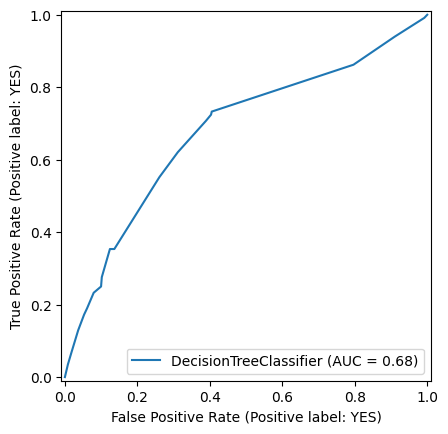

In [60]:
# ROC curve in text form (less common)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, [x[1] for x in preds_proba], pos_label="YES")
print(fpr)
print(tpr)
print(thresholds)

# ROC curve in graph form
RocCurveDisplay.from_estimator(bin_clf, X_test, Y_test)

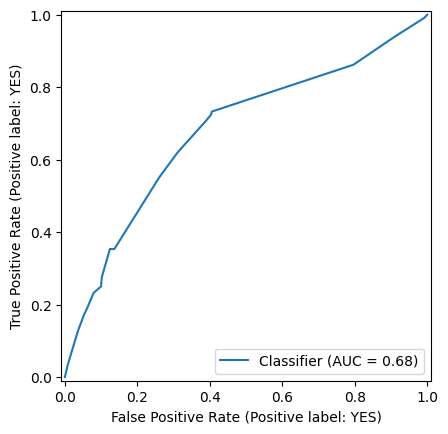

In [61]:
# Or from results
# The function takes only the probabilites of the positive class, hence [x[1] for x in preds_proba]
RocCurveDisplay.from_predictions(Y_test, [x[1] for x in preds_proba], pos_label="YES")

In [62]:
# Just the AUC score
sklearn.metrics.roc_auc_score(Y_test, [x[1] for x in preds_proba])

np.float64(0.6775756724489078)

A bigger area under the curve (AUC - area under curve), the better the results. The top left point would indicate a scenario where both sensitivity and specificity equal 1 - the perfect result.